In [45]:
!pip install statsmodels


In [57]:
!pip install pmdarima

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# clean time series data (already did this in the prophet but include just in case)
ts_data = df_super[
    (df_super['location_name'] == 'Sub-Saharan Africa') &
    (df_super['cause_name'] == 'Diarrheal diseases') &
    (df_super['measure_name'] == 'Deaths') &
    (df_super['metric_name'] == 'Rate')
][['year', 'val']]

# Set year as the index (needed for ARIMA)
ts_data.set_index('year', inplace=True)


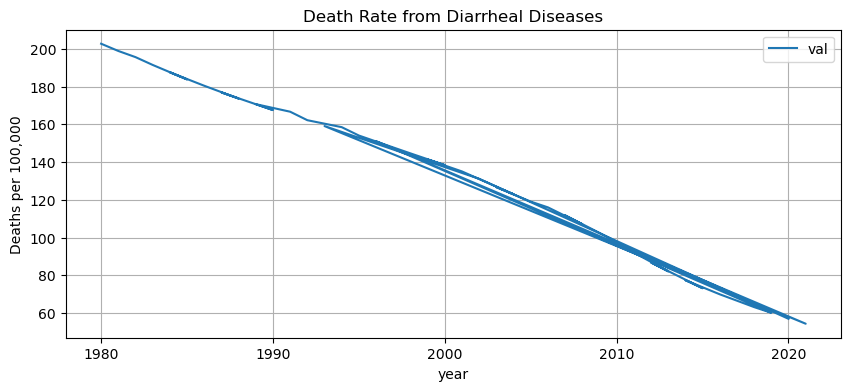

In [48]:
# Plot the time series
ts_data.plot(figsize=(10, 4), title='Death Rate from Diarrheal Diseases')
plt.ylabel('Deaths per 100,000')
plt.grid(True)
plt.show()


In [ ]:
# check what's actuall in ts_data 
# double checking if year is set as an index before fitting
print(ts_data.columns)


Index(['val'], dtype='object')


In [51]:
# reset the index
ts_data = ts_data.reset_index()

# convert into datetime index
ts_data['year'] = pd.to_datetime(ts_data['year'], format='%Y')
ts_data.set_index('year', inplace=True)


In [52]:
# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(ts_data, order=(1, 1, 1))
fit = model.fit()


/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, 

/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


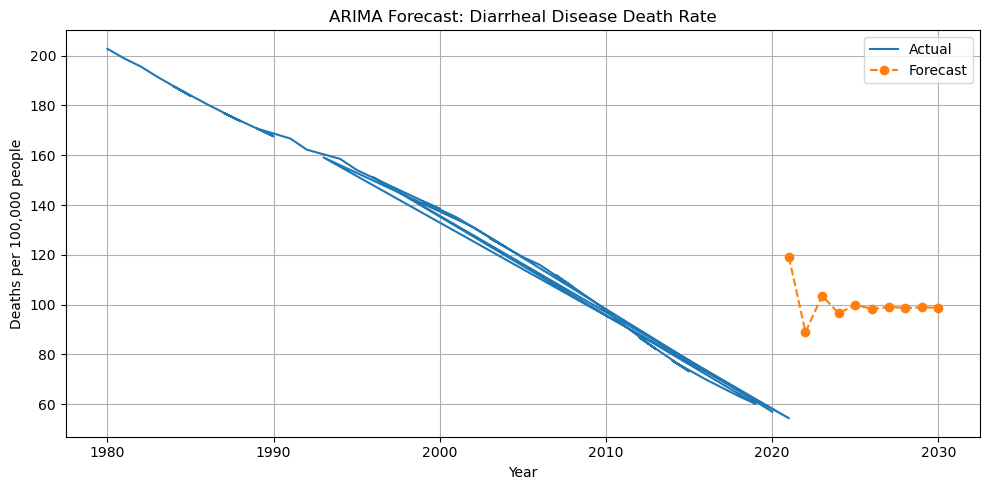

In [54]:
# Forecast 10 steps ahead
forecast = fit.forecast(steps=10)

# Create future years
#future_years = list(range(ts_data.index.max() + 1, ts_data.index.max() + 11))

# Create a datetime index for 10 future years, starting after the last known year
future_years = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(years=1), periods=10, freq='YS')

# Plot actual + forecast
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data['val'], label='Actual')
plt.plot(future_years, forecast, label='Forecast', linestyle='dashed', marker='o')
plt.title("ARIMA Forecast: Diarrheal Disease Death Rate")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000 people")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


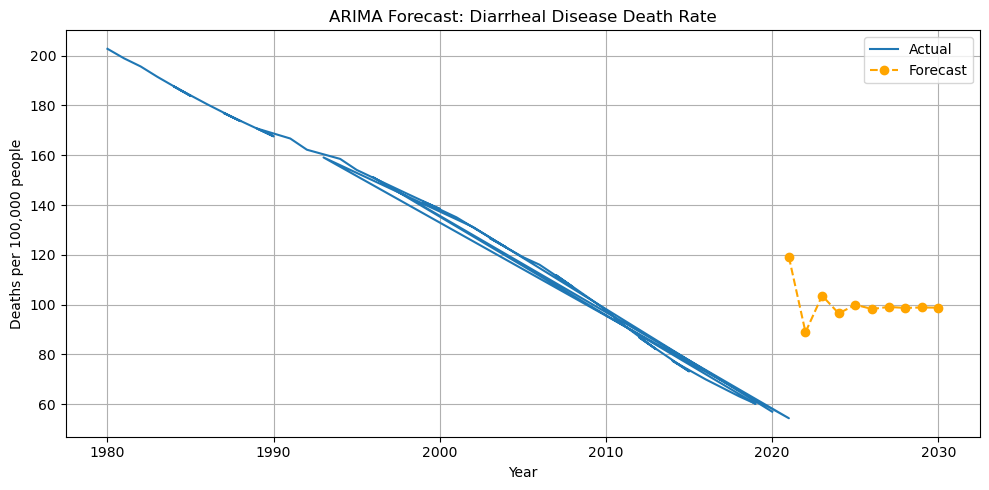

In [55]:
plt.figure(figsize=(10, 5))

# Plot the historical data
plt.plot(ts_data.index, ts_data['val'], label='Actual')

# Plot the forecasted data
plt.plot(future_years, forecast, label='Forecast', linestyle='dashed', marker='o', color='orange')

# Labels and style
plt.title("ARIMA Forecast: Diarrheal Disease Death Rate")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000 people")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
